# Auto ML

## Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Preprocessing Data

#### Loading Data

In [3]:
df = pd.read_excel("2014 and 2015 CSM dataset.xlsx")
df.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


#### Dropping Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
Movie                  231 non-null object
Year                   231 non-null int64
Ratings                231 non-null float64
Genre                  231 non-null int64
Gross                  231 non-null int64
Budget                 230 non-null float64
Screens                221 non-null float64
Sequel                 231 non-null int64
Sentiment              231 non-null int64
Views                  231 non-null int64
Likes                  231 non-null int64
Dislikes               231 non-null int64
Comments               231 non-null int64
Aggregate Followers    196 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.3+ KB


#### Imputing Missing Data

#### One-hot Encoding

#### Numerical Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"]) 
np.array([2, 2, 1])
list(le.inverse_transform([2, 2, 1]))

/Users/fernandojavier/anaconda3/envs/msds/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['tokyo', 'tokyo', 'paris']

#### Data Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mmsc = MinMaxScaler()
stdsc = StandardScaler()

### Exploratory Data Analysis

In [ ]:
df_eda = df.copy()
df_eda.dteday = pd.to_datetime(df_eda.dteday)
plt.plot(df_eda.dteday, df_eda['count'])

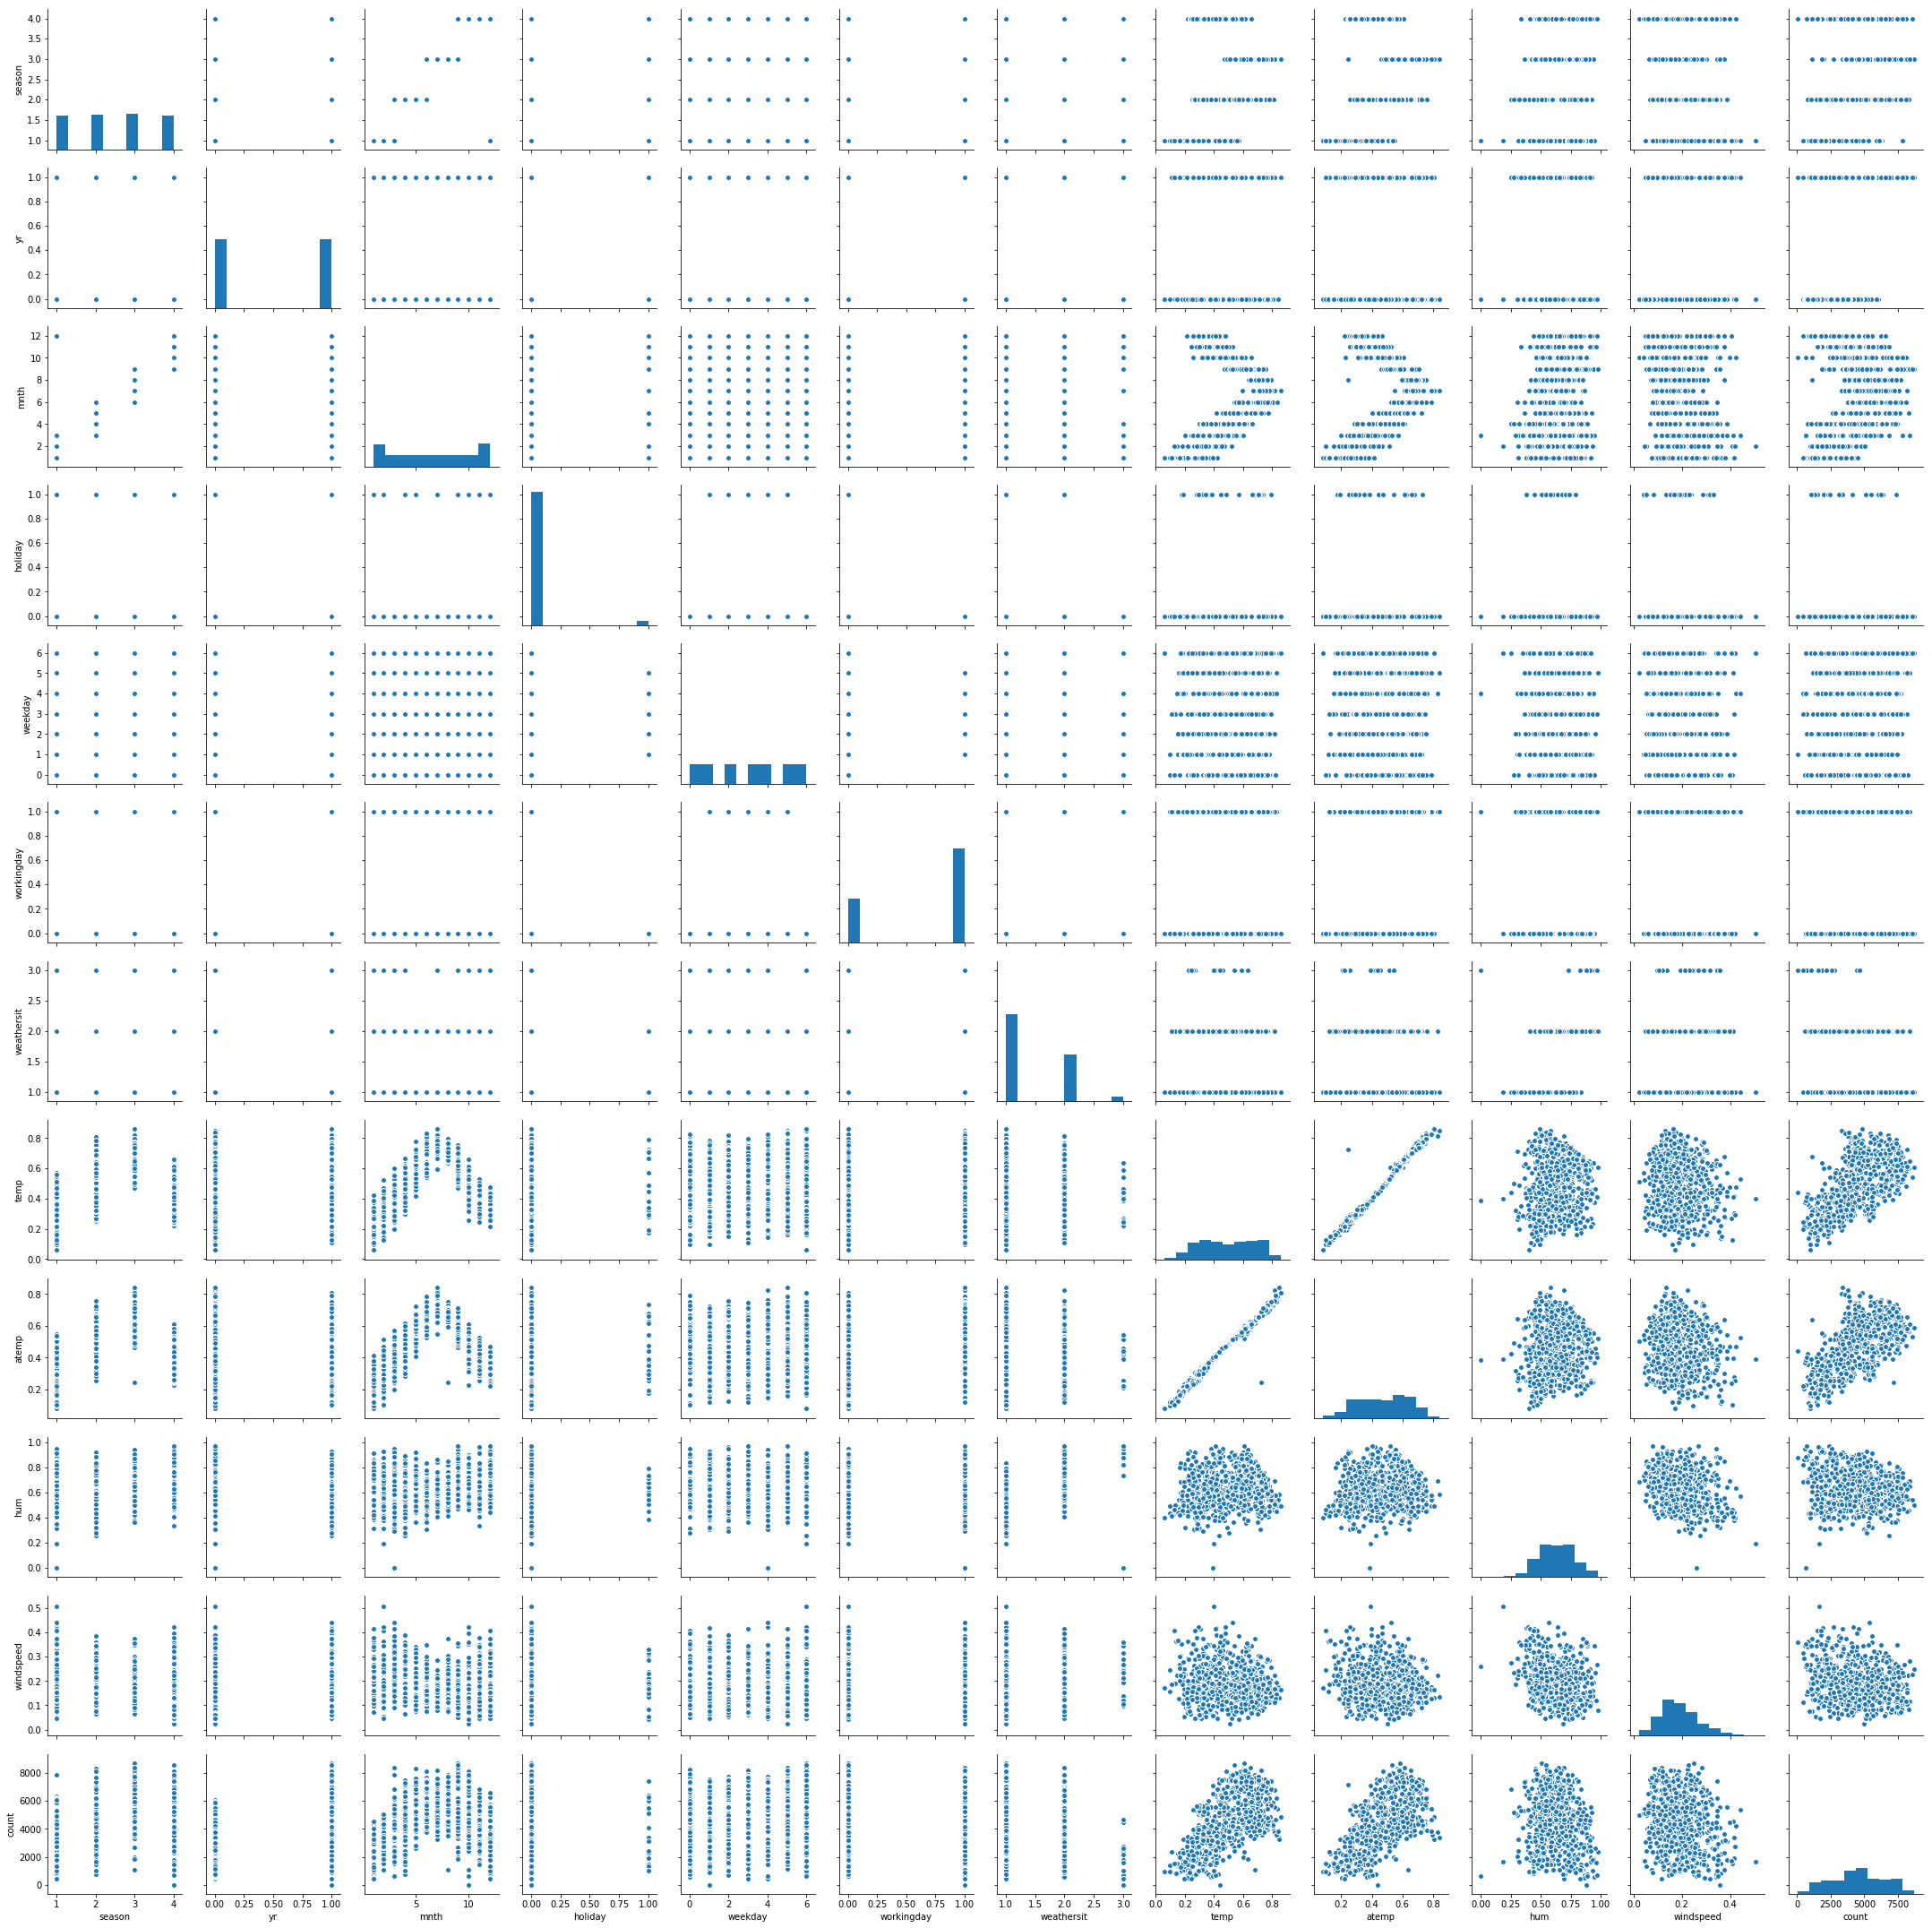

In [7]:
sns.pairplot(df.iloc[:, 2:])

### Splitting Feature Set and Target Variable

In [9]:
from sklearn.model_selection import train_test_split

columns = ['mnth', 'temp', 'hum', 'windspeed', 'count']
df_tt = df[columns]
X = df_tt.drop('count', axis=1)
y = df_tt['count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

### Regressors

In this section, we define several machine learning regression functions, namely:

||Type|Name|
|:-|:-|:-|:-|
|1|Similarity-based learning|kNN Regressor|
|2|Error-based learning|Linear Regression|
|3|Error-based learning|Support Vector Machine Regressor|
|4|Information-based learning|Decision Tree Regressor|
|5|Information-based learning|Random Forest Regressor|
|6|Information-based learning|Gradient Boosting Regressor|
|7|Error-based learning|ARIMA|


#### Loading Packages

In [6]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [10]:
class ML_Regressor:

    def fit(self, feature, target, ml_type,
            param_range, seed_settings=range(0, 30)):
        """
        Fit data to machine learning regressor. Iterate regression model 
        mutiple times. Return the maximum accuracy achieved and the
        corresponding parameter.

        Inputs
        ======
        feature: Dataframe of features
        target: Series of target values
        param_range: Range of values for parameters
        seed_settings: Range of seed settings to run

        Outputs
        =======
        acc_max: Float. Maximum regression accuracy achieved.
        param_max: Float. Regressor parameter that gives maximum accuracy.
        """

        self.param_range = param_range
        self.ml_type = ml_type

        train_acc = []
        test_acc = []

        feature_importance = []

        # Initiate counter for number of trials
        self.iterations = 0

        # Initial stuff
        self.kernel = 'rbf'

        # create an array of cols: parameters and rows: seeds
        for seed in seed_settings:

            # count one trial
            self.iterations += 1

            # split data into test and training sets
            X_train, X_test, y_train, y_test = train_test_split(feature,
                                                                target,
                                                                random_state=seed)
            train = []
            test = []
            coefs = []

            # make a list of accuracies for different parameters
            for param in param_range:
                # build the model
                if ml_type == 'knn_reg':
                    clf = KNeighborsRegressor(n_neighbors=param)

                elif ml_type == 'lin_reg':
                    clf = LinearRegression()

                elif ml_type == 'ridge':
                    clf = Ridge(alpha=param)

                elif ml_type == 'lasso':
                    clf = Lasso(alpha=param, max_iter=self.max_iter)

                elif ml_type == 'linear_svm':
                    clf = LinearSVR(C=param)

                elif ml_type == 'svm':
                    clf = SVR(C=param, kernel=self.kernel)

                elif ml_type == 'decision_tree':
                    clf = DecisionTreeRegressor(max_depth=param)

                elif ml_type == 'random_forest':
                    clf = RandomForestRegressor(
                        max_features=int(np.log2(X_train.shape[1])), max_depth=param, n_estimators=100)

                elif ml_type == 'gbm':
                    clf = GradientBoostingRegressor(
                        max_features=param, n_estimators=500)

                # fit training set to classifier
                clf.fit(X_train, y_train)

                # record training set accuracy
                train.append(clf.score(X_train, y_train))

                # record generalization accuracy
                test.append(clf.score(X_test, y_test))

                # record coefficients if ml_type != knn_class
                # get coef @ 0.01
                if ml_type not in ("knn_reg", "svm", "decision_tree", "gbm") and param == 0.01:
                    coefs.append(clf.coef_)

                if ml_type in ("decision_tree", "gbm"):
                    feature_importance.append(clf.feature_importances_)

            # append the list to _acc arrays
            train_acc.append(train)
            test_acc.append(test)

        # compute mean and error across columns
        self.train_all = np.mean(train_acc, axis=0)
        self.test_all = np.mean(test_acc, axis=0)

        # compute mean coefficients
        if ml_type not in ("knn_reg", "svm", "decision_tree"):
            self.coefs_all = np.mean(coefs, axis=0).ravel()

        if ml_type in ("decision_tree", "gbm"):
            self.coefs_all = np.mean(feature_importance, axis=0)

        # compute variance of accuracies
        self.var_train = np.var(train_acc, axis=0)
        self.var_test = np.var(test_acc, axis=0)

        # compute the best parameter and maximum accuracy
        self.max_inds = np.argmax(self.test_all)
        self.acc_max = np.amax(self.test_all)
        self.param_max = (self.param_range)[self.max_inds]

        return np.round(self.acc_max, 4), self.param_max

    def plot(self, report=True):
        """
        Plot accuracy vs parameter for test and training data. Print
        maximum accuracy and corresponding parameter value. Print number of 
        trials.

        Inputs
        ======
        report: Boolean. Will show report if True

        Outputs
        =======
        Plot of accuracy vs parameter for test and training data
        Report showing number of maximum accuracy, optimal parameters
        and no. of iterations
        """

        if self.ml_type in ["linear_svm", "svm"]:
            plt.xscale("log")

        # plot train and errors and standard devs
        plt.plot(self.param_range, self.train_all, c='b',
                 label="training set", marker='.')
        plt.fill_between(self.param_range,
                         self.train_all + self.var_train,
                         self.train_all - self.var_train,
                         color='b', alpha=0.1)

        # plot test and errors and standard devs
        plt.plot(self.param_range, self.test_all,
                 c='r', label="test set", marker='.')
        plt.fill_between(self.param_range,
                         self.test_all + self.var_test,
                         self.test_all - self.var_test,
                         color='r', alpha=0.1)

        plt.xlabel('Parameter Value')
        plt.ylabel('Accuracy')
        plt.title(self.ml_type + ": Accuracy vs Parameter Value")
        plt.legend(loc=0)

        plt.tight_layout()
        plt.show()

        if report == True:
            print('Report:')
            print('=======')
            print("Max average accuracy: {}".format(
                np.round(self.acc_max, 4)))
            print("Var of accuracy at optimal parameter: {0:.4f}".format(
                self.var_test[self.max_inds]))
            print("Optimal parameter: {0:.4f}".format(self.param_max))
            print('Total iterations: {}'.format(self.iterations))

#### kNN Regressor

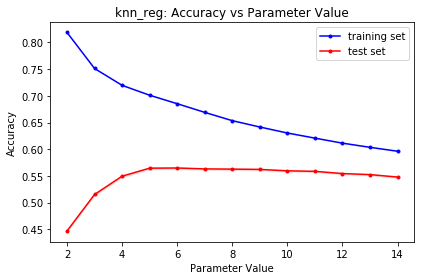

Report:
Max average accuracy: 0.5648
Var of accuracy at optimal parameter: 0.0016
Optimal parameter: 6.0000
Total iterations: 30


In [11]:
ml_reg = ML_Regressor()
param_range = range(2, 15)
acc_knn_reg, param_knn_reg = ml_reg.fit(X, y, "knn_reg", param_range = param_range)
param_knn_reg = {'n neighbors', param_knn_reg}
ml_reg.plot()

Best accuracy: 0.5231752088117426
Best parameter: {'n_neighbors': 6}


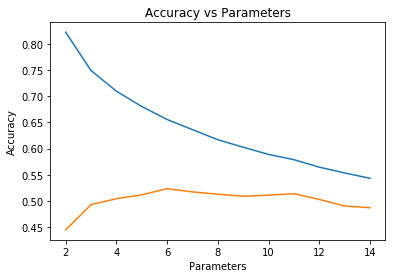

In [12]:
# knn regressor
param_grid = {'n_neighbors':range(2, 15)}
knr = KNeighborsRegressor()
reg = GridSearchCV(knr, param_grid = param_grid, return_train_score=True)
reg.fit(X_train, y_train)
results = pd.DataFrame(reg.cv_results_)
params = results.param_n_neighbors
train_score = results.mean_train_score
test_score = results.mean_test_score
plt.plot(params, train_score)
plt.plot(params, test_score)
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")

best_param_knn_reg = reg.best_params_
best_accuracy_knn_reg = reg.best_score_

print("Best accuracy:",best_accuracy_knn_reg)
print("Best parameter:",best_param_knn_reg)

#### Linear Regressor

In [13]:
# Linear regressor
reg = LinearRegression()
reg.fit(X_train, y_train)

acc_linear_reg = reg.score(X_test, y_test)
intercept_linear_reg = reg.intercept_
inds = np.argsort(np.abs(reg.coef_))[::-1]
top_predictor_linear_reg = X_train.columns[inds][0]

print("Best accuracy:",acc_linear_reg)
print("intercept:",intercept_linear_reg)
print("coefs:", reg.coef_)
print("Top predictor:", top_predictor_linear_reg)

Best accuracy: 0.5159666621599249
intercept: 3529.3734472818523
coefs: [  104.22420756  6138.89998216 -3183.84800671 -3677.1601292 ]
Top predictor: temp


#### Lasso Regressor

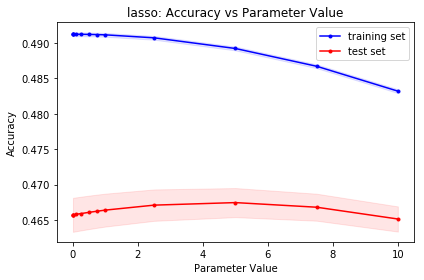

Report:
Max average accuracy: 0.4675
Var of accuracy at optimal parameter: 0.0021
Optimal parameter: 5.0000
Total iterations: 30


Index(['temp', 'mnth', 'hum', 'windspeed'], dtype='object')

In [14]:
ml_reg = ML_Regressor()
ml_reg.max_iter = 10000
param_range = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10]
acc_lasso, param_lasso = ml_reg.fit(X, y, "lasso", param_range = param_range)
param_lasso = {'alpha': param_lasso}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_lasso = X.columns[inds]
top_predictor_lasso

#### Ridge Regressor

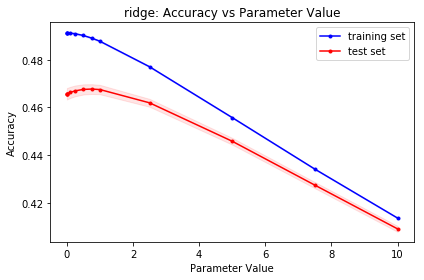

Report:
Max average accuracy: 0.4677
Var of accuracy at optimal parameter: 0.0020
Optimal parameter: 0.7500
Total iterations: 30


Index(['temp', 'mnth', 'hum', 'windspeed'], dtype='object')

In [15]:
ml_reg = ML_Regressor()
param_range = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10]
acc_ridge, param_ridge = ml_reg.fit(X, y, "ridge", param_range = param_range)
param_ridge = {'alpha': param_ridge}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_ridge = X.columns[inds]
top_predictor_ridge

#### Linear SVM Regressor

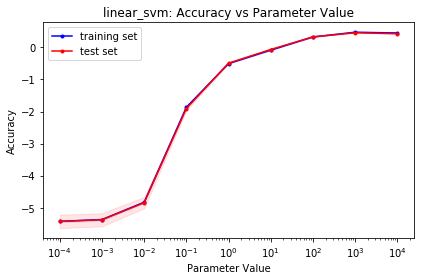

Report:
Max average accuracy: 0.4561
Var of accuracy at optimal parameter: 0.0025
Optimal parameter: 1000.0000
Total iterations: 30


Index(['mnth', 'hum', 'temp', 'windspeed'], dtype='object')

In [16]:
ml_reg = ML_Regressor()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_lsvm, param_lsvm = ml_reg.fit(X, y, "linear_svm", param_range = param_range)
param_lsvm = {'C': param_lsvm}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_lsvm = X.columns[inds]
top_predictor_lsvm

Best accuracy: 0.45095655171223825
Best parameter: {'C': 10000}


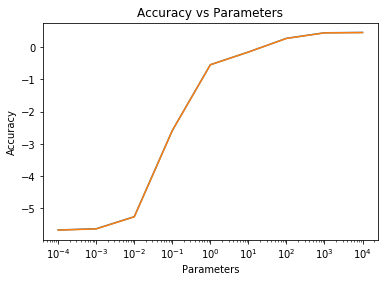

In [17]:
# SVM regressor
param_grid = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
lsvm = LinearSVR()
reg = GridSearchCV(lsvm, param_grid = param_grid, return_train_score=True)
reg.fit(X_train, y_train)
results = pd.DataFrame(reg.cv_results_)
params = results.param_C

train_score = results.mean_train_score
test_score = results.mean_test_score

plt.semilogx()
plt.plot(params, train_score)
plt.plot(params, test_score)

plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")

best_param_lsvm = reg.best_params_
best_accuracy_lsvm = reg.best_score_

print("Best accuracy:",best_accuracy_lsvm)
print("Best parameter:",best_param_lsvm)

zip(test_score, train_score)

#### Nonlinear SVM Regressor

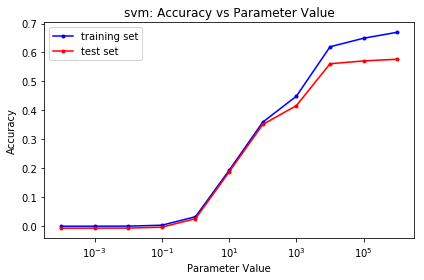

Report:
Max average accuracy: 0.5766
Var of accuracy at optimal parameter: 0.0018
Optimal parameter: 1000000.0000
Total iterations: 30


In [18]:
ml_reg = ML_Regressor()
ml_reg.kernel = 'rbf'
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
acc_svm, param_svm = ml_reg.fit(X, y, "svm", param_range = param_range)
param_svm = {'C': param_svm}
ml_reg.plot()

#### Decision Tree

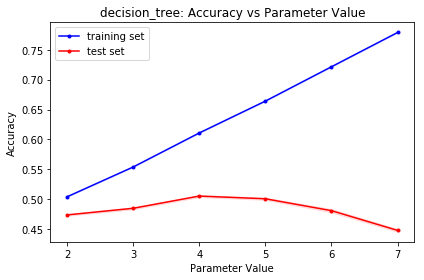

Report:
Max average accuracy: 0.5051
Var of accuracy at optimal parameter: 0.0018
Optimal parameter: 4.0000
Total iterations: 30


Index(['temp', 'hum', 'windspeed', 'mnth'], dtype='object')

In [19]:
ml_reg = ML_Regressor()
param_range = [2, 3, 4, 5, 6, 7]
acc_dt, param_dt = ml_reg.fit(X, y, "decision_tree", param_range = param_range)
param_dt = {'max_depth': param_dt}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_dt = X.columns[inds]
top_predictor_dt

#### Random Forest

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


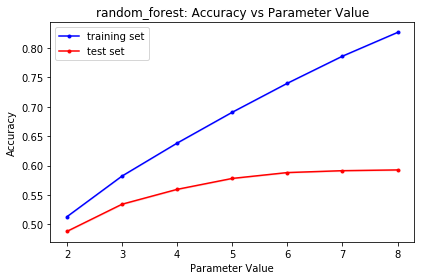

Report:
Max average accuracy: 0.5927
Var of accuracy at optimal parameter: 0.0009
Optimal parameter: 8.0000
Total iterations: 30


Index(['mnth'], dtype='object')

In [20]:
ml_reg = ML_Regressor()
param_range = [2, 3, 4, 5, 6, 7, 8]
acc_rf, param_rf = ml_reg.fit(X, y, "random_forest", param_range = param_range)
param_rf = {'max_depth': param_rf}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_rf = X.columns[inds]
top_predictor_rf

#### Gradient Boosting

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


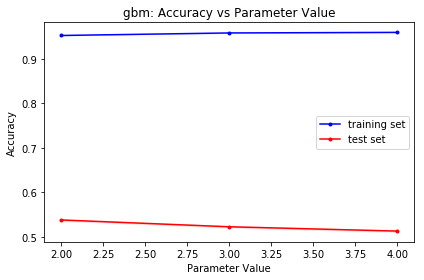

Report:
Max average accuracy: 0.538
Var of accuracy at optimal parameter: 0.0016
Optimal parameter: 2.0000
Total iterations: 30


Index(['temp', 'windspeed', 'hum', 'mnth'], dtype='object')

In [21]:
ml_reg = ML_Regressor()
param_range = [2, 3, 4]
acc_gbm, param_gbm = ml_reg.fit(X, y, "gbm", param_range = param_range)
param_gbm = {'max_depth': param_gbm}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_gbm = X.columns[inds]
top_predictor_gbm

### Summary

In [22]:
regressors = pd.Series(['knn_reg', 'linear_reg', 'lasso', 'ridge', 'linear_svm',
                        'nonlinear_svm', 'decision_tree', 'random_forest', 'gbm'], name='ML_Type')
accuracies = pd.Series([acc_knn_reg, acc_linear_reg, acc_lasso, acc_ridge,
                        acc_lsvm, acc_svm, acc_dt, acc_rf, acc_gbm], name='Accuracy')
parameters = pd.Series([param_knn_reg, "-", param_lasso, param_ridge, param_lsvm, param_svm,
                        param_dt, param_rf, param_gbm], name='Best Parameter')
top_predictors = pd.Series(['-', top_predictor_linear_reg, top_predictor_lasso[0],
                            top_predictor_ridge[0], top_predictor_lsvm[0], "-", top_predictor_dt[0],
                            top_predictor_rf[0], top_predictor_gbm[0]], name="Top Predictor")
df_summary = pd.concat([regressors, accuracies, parameters, top_predictors], axis=1)
df_summary.sort_values(by='Accuracy', ascending=False)

,ML_Type,Accuracy,Best Parameter,Top Predictor
7,random_forest,0.592700,{'max_depth': 8},mnth
5,nonlinear_svm,0.576600,{'C': 1000000},-
0,knn_reg,0.564800,"{n neighbors, 6}",-
8,gbm,0.538000,{'max_depth': 2},temp
1,linear_reg,0.515967,-,temp
6,decision_tree,0.505100,{'max_depth': 4},temp
3,ridge,0.467700,{'alpha': 0.75},temp
2,lasso,0.467500,{'alpha': 5},temp
4,linear_svm,0.456100,{'C': 1000},mnth


## Classification

### Loading and Preprocessing Data

#### Loading Data

In [72]:
df = pd.read_csv('Fruits.csv', delimiter=' ')
df = df.drop(['fruit_name', 'fruit_subtype'], axis=1)
df.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


#### Dropping Missing Data

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
fruit_label    59 non-null int64
mass           59 non-null int64
width          59 non-null float64
height         59 non-null float64
color_score    59 non-null float64
dtypes: float64(3), int64(2)
memory usage: 2.4 KB


#### Imputing Missing Data

#### One-hot Encoding

#### Numerical Label Encoder

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"]) 
np.array([2, 2, 1])
list(le.inverse_transform([2, 2, 1]))

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['tokyo', 'tokyo', 'paris']

#### Data Scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mmsc = MinMaxScaler()
stdsc = StandardScaler()

### Exploratory Data Analysis

In [76]:
df_eda = df.copy()
df_eda.columns

Index(['fruit_label', 'mass', 'width', 'height', 'color_score'], dtype='object')

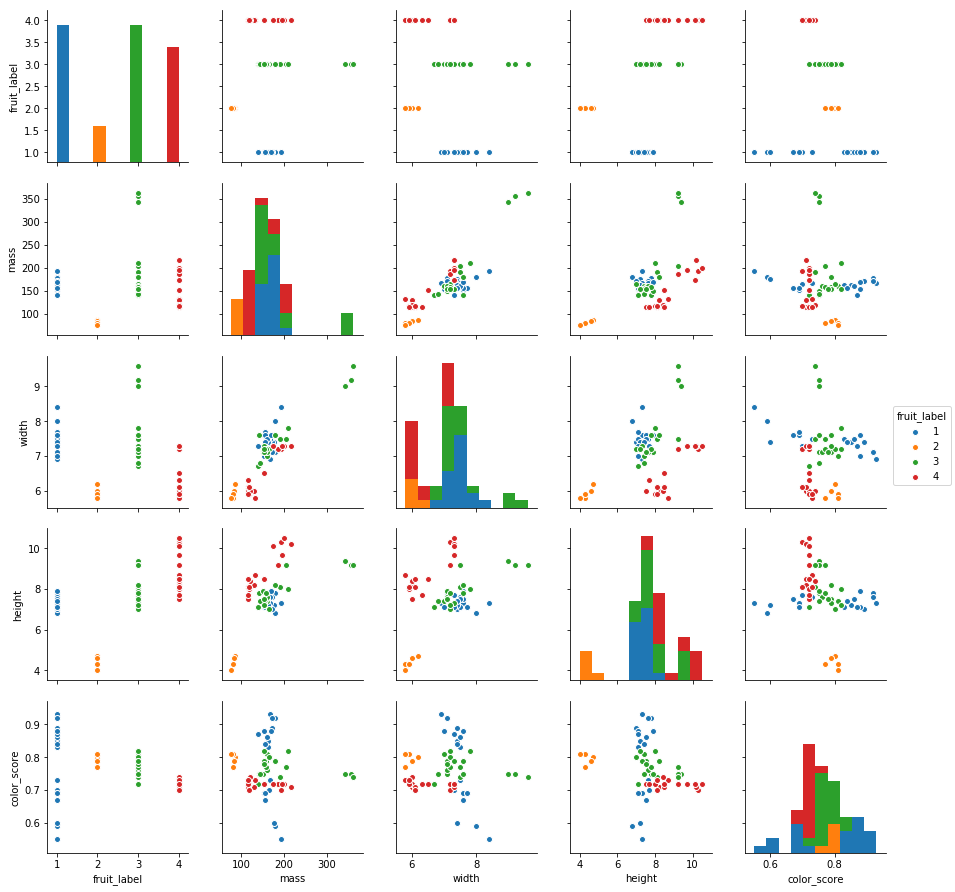

In [78]:
sns.pairplot(df_eda, hue='fruit_label')

### Splitting Feature Set and Target Variable

In [79]:
from sklearn.model_selection import train_test_split

X = df.drop('fruit_label', axis=1)
y = df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

#### Proportional Chance Criterion

Population per class:


,Counts
1,19
2,5
3,19
4,16


1.25 * Proportion Chance Criterion: 36.02%


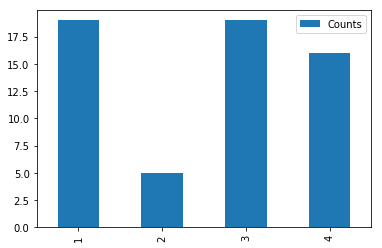

In [80]:
from collections import Counter
state_counts = Counter(y)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.columns = ['Counts']
df_state.plot(kind='bar')
print("Population per class:")
display(df_state)
num = (df_state['Counts'] / df_state['Counts'].sum())**2
print(
    "1.25 * Proportion Chance Criterion: {0:.2f}%".format(1.25 * 100 * num.sum()))

### Classifiers

In this section, we define several machine learning classification functions, namely:

|Type|Name|
|:-|:-|:-|:-|
|1|Similarity-based learning|kNN Classifier|
|2|Error-based learning|Linear Regression|
|3|Error-based learning|Logistic Regression|
|4|Error-based learning|Support Vector Machine Classifier|
|5|Information-based learning|Decision Tree Classifier|
|6|Information-based learning|Random Forest Classifier|
|7|Information-based learning|Gradient Boosting Classifier|
|8|Probability-based learning|Naive-Bayes Classifier|


In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [82]:
class ML_Classifier:

    def fit(self, feature, target, ml_type,
            param_range, seed_settings=range(0, 30)):
        """
        Fit data to machine learning regressor. Iterate regression model 
        mutiple times. Return the maximum accuracy achieved and the
        corresponding parameter.

        Inputs
        ======
        feature: Dataframe of features
        target: Series of target values
        param_range: Range of values for parameters
        seed_settings: Range of seed settings to run

        Outputs
        =======
        acc_max: Float. Maximum regression accuracy achieved.
        param_max: Float. Regressor parameter that gives maximum accuracy.
        """

        self.param_range = param_range
        self.ml_type = ml_type

        train_acc = []
        test_acc = []

        feature_importance = []

        # Initiate counter for number of trials
        self.iterations = 0

        # create an array of cols: parameters and rows: seeds
        for seed in seed_settings:

            # count one trial
            self.iterations += 1

            # split data into test and training sets
            X_train, X_test, y_train, y_test = train_test_split(feature,
                                                                target,
                                                                random_state=seed)
            train = []
            test = []
            coefs = []

            # make a list of accuracies for different parameters
            for param in param_range:
                # build the model
                if ml_type == 'knn_class':
                    clf = KNeighborsClassifier(n_neighbors=param)

                elif ml_type == 'log_reg':
                    clf = LogisticRegression(C=param, penalty=self.penalty)

                elif ml_type == 'linear_svm':
                    clf = LinearSVC(C=param, penalty=self.penalty, dual=False)

                elif ml_type == 'svm':
                    clf = SVC(C=param, kernel=self.kernel)

                elif ml_type == 'decision_tree':
                    clf = DecisionTreeClassifier(max_depth=param)

                elif ml_type == 'random_forest':
                    clf = RandomForestClassifier(
                        max_features=int(np.sqrt(X_train.shape[1])), max_depth=param)

                elif ml_type == 'gbm':
                    clf = GradientBoostingClassifier(max_depth=param)

                elif ml_type == 'naive_bayes':
                    clf = GaussianNB()

                # fit training set to classifier
                clf.fit(X_train, y_train)

                # record training set accuracy
                train.append(clf.score(X_train, y_train))

                # record generalization accuracy
                test.append(clf.score(X_test, y_test))

                # record coefficients if ml_type != knn_class
                # get coef @ 0.01
                if ml_type not in ("knn_class", "svm", "decision_tree", "gbm") and param == 0.01:
                    coefs.append(clf.coef_)

                if ml_type in ("decision_tree", "gbm"):
                    feature_importance.append(clf.feature_importances_)

            # append the list to _acc arrays
            train_acc.append(train)
            test_acc.append(test)

        # compute mean and error across columns
        self.train_all = np.mean(train_acc, axis=0)
        self.test_all = np.mean(test_acc, axis=0)

        # compute mean coefficients
        if ml_type not in ("knn_class", "svm", "decision_tree"):
            self.coefs_all = np.mean(coefs, axis=0).ravel()

        if ml_type in ("decision_tree", "gbm"):
            self.coefs_all = np.mean(feature_importance, axis=0)

        # compute variance of accuracies
        self.var_train = np.var(train_acc, axis=0)
        self.var_test = np.var(test_acc, axis=0)

        # compute the best parameter and maximum accuracy
        self.max_inds = np.argmax(self.test_all)
        self.acc_max = np.amax(self.test_all)
        self.param_max = (self.param_range)[self.max_inds]
        
        # compute 1.25 x pcc
        state_counts = Counter(target)
        df_state = pd.DataFrame.from_dict(state_counts, orient='index')
        num = (df_state[0] / df_state[0].sum())**2
        self.pcc = 1.25 * num.sum()

        return np.round(self.acc_max, 4), self.param_max

    def plot(self, report=True):
        """
        Plot accuracy vs parameter for test and training data. Print
        maximum accuracy and corresponding parameter value. Print number of 
        trials.

        Inputs
        ======
        report: Boolean. Will show report if True

        Outputs
        =======
        Plot of accuracy vs parameter for test and training data
        Report showing number of maximum accuracy, optimal parameters
        and no. of iterations
        """

        if self.ml_type in ["log_reg", "linear_svm", "svm"]:
            plt.xscale("log")

        # plot train and errors and standard devs
        plt.plot(self.param_range, self.train_all, c='b',
                 label="training set", marker='.')
        plt.fill_between(self.param_range,
                         self.train_all + self.var_train,
                         self.train_all - self.var_train,
                         color='b', alpha=0.1)

        # plot test and errors and standard devs
        plt.plot(self.param_range, self.test_all,
                 c='r', label="test set", marker='.')
        plt.fill_between(self.param_range,
                         self.test_all + self.var_test,
                         self.test_all - self.var_test,
                         color='r', alpha=0.1)

        plt.xlabel('Parameter Value')
        plt.ylabel('Accuracy')
        plt.title(self.ml_type + ": Accuracy vs Parameter Value")

        plt.plot(self.param_range, [self.pcc] * len(self.param_range),
                 c='tab:gray', label="1.25 x PCC", linestyle='--')

        plt.legend(loc=0)
        plt.tight_layout()
        plt.show()

        if report == True:
            print('Report:')
            print('=======')
            print("Max average accuracy: {}".format(
                np.round(self.acc_max, 4)))
            print("Var of accuracy at optimal parameter: {0:.4f}".format(
                self.var_test[self.max_inds]))
            print("Optimal parameter: {0:.4f}".format(self.param_max))
            if self.ml_type in ['log_reg', 'linear_svm']:
                print("Regularization: ", self.penalty)
            print('Total iterations: {}'.format(self.iterations))
            print('1.25 x PCC: {0:.4f}'.format(self.pcc))
            print('Total iterations: {}'.format(self.iterations))

#### kNN Classifier

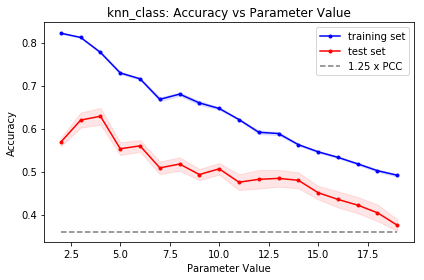

Report:
Max average accuracy: 0.6289
Var of accuracy at optimal parameter: 0.0195
Optimal parameter: 4.0000
Total iterations: 30
1.25 x PCC: 0.3602
Total iterations: 30

Confusion Matrix Using Best Parameters


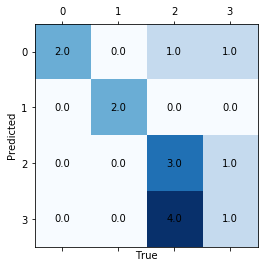

In [83]:
from collections import Counter

ml_class = ML_Classifier()
param_range = range(2, 20)
acc_knn_class, param_knn_class = ml_class.fit(
    X, y, ml_type='knn_class', param_range=param_range)
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knc = KNeighborsClassifier(n_neighbors=param_knn_class)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

param_knn_class = {'n neighbors' : param_knn_class}

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

In [84]:
# # knn regressor using grid search - sanity check
# param_grid = {'n_neighbors':range(2, 15)}
# knr = KNeighborsClassifier()
# reg = GridSearchCV(knr, param_grid = param_grid, return_train_score=True)
# reg.fit(X_train, y_train)
# results = pd.DataFrame(reg.cv_results_)
# params = results.param_n_neighbors
# train_score = results.mean_train_score
# test_score = results.mean_test_score
# plt.plot(params, train_score)
# plt.plot(params, test_score)
# plt.xlabel("Parameters")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs Parameters")

# best_param_knn_ = reg.best_params_
# best_accuracy_knn_ = reg.best_score_

# print("Best accuracy:",best_accuracy_knn_)
# print("Best parameter:",best_param_knn_)

#### Logistic Regression L1

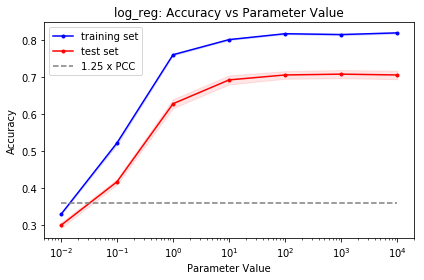

Report:
Max average accuracy: 0.7089
Var of accuracy at optimal parameter: 0.0111
Optimal parameter: 1000.0000
Regularization:  l1
Total iterations: 30
1.25 x PCC: 0.3602
Total iterations: 30

Confusion Matrix Using Best Parameters


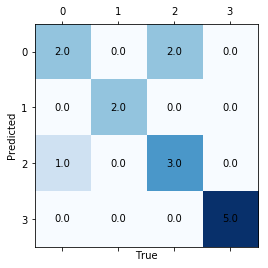

In [85]:
ml_class = ML_Classifier()
penalty = 'l1'
ml_class.penalty = penalty
param_range = [0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_log_reg_l1, param_log_reg_l1 = ml_class.fit(
    X, y, ml_type='log_reg', param_range=param_range)
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = LogisticRegression(penalty=penalty, C=param_log_reg_l1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
inds = np.argsort(clf.coef_[0])[::-1]  # n classes X n features

top_predictor_log_reg_l1 = X.columns[inds]

param_log_reg_l1 = {'C' : param_log_reg_l1}

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

#### Logistic Regression L2

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


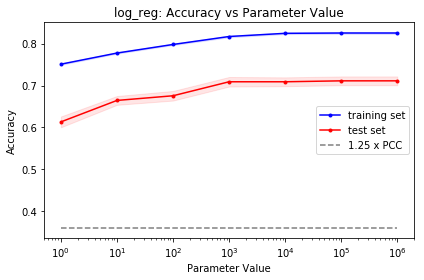

Report:
Max average accuracy: 0.7111
Var of accuracy at optimal parameter: 0.0105
Optimal parameter: 100000.0000
Regularization:  l2
Total iterations: 30
1.25 x PCC: 0.3602
Total iterations: 30

Confusion Matrix Using Best Parameters


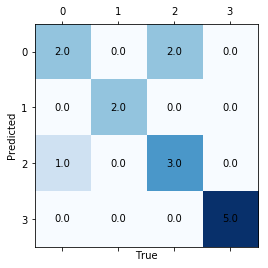

In [86]:
ml_class = ML_Classifier()
penalty = 'l2'
ml_class.penalty = penalty
param_range = [1, 10, 100, 1000, 10000, 100000, 1000000]
acc_log_reg_l2, param_log_reg_l2 = ml_class.fit(
    X, y, ml_type='log_reg', param_range=param_range)
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = LogisticRegression(penalty=penalty, C=param_log_reg_l2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
inds = np.argsort(clf.coef_[0])[::-1]  # n classes X n features

top_predictor_log_reg_l2 = X.columns[inds]
    
param_log_reg_l2 = {'C' : param_log_reg_l2}

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

#### Linear SVM L1

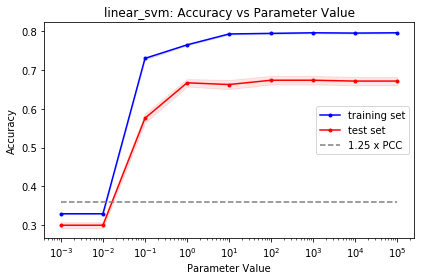

Report:
Max average accuracy: 0.6733
Var of accuracy at optimal parameter: 0.0111
Optimal parameter: 100.0000
Regularization:  l1
Total iterations: 30
1.25 x PCC: 0.3602
Total iterations: 30

Confusion Matrix Using Best Parameters


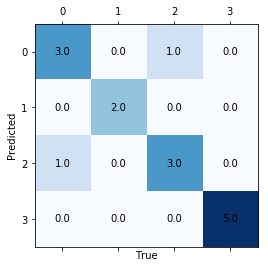

In [87]:
ml_class = ML_Classifier()
penalty = 'l1'
ml_class.penalty = penalty
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
acc_lsvm_l1, param_lsvm_l1 = ml_class.fit(
    X, y, ml_type='linear_svm', param_range=param_range)
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = LinearSVC(penalty=penalty, C=param_lsvm_l1, dual=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
inds = np.argsort(clf.coef_[0])[::-1]  # n classes X n features

top_predictor_lsvm_l1 = X.columns[inds]

param_lsvm_l1 = {'C' : param_lsvm_l1}

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

#### Linear SVM L2

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


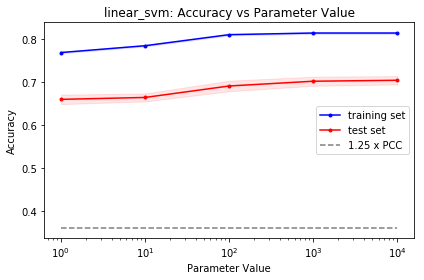

Report:
Max average accuracy: 0.7044
Var of accuracy at optimal parameter: 0.0097
Optimal parameter: 10000.0000
Regularization:  l2
Total iterations: 30
1.25 x PCC: 0.3602
Total iterations: 30

Confusion Matrix Using Best Parameters


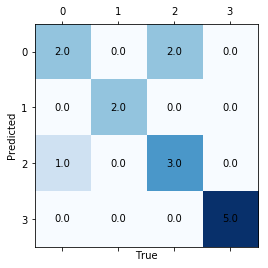

In [88]:
ml_class = ML_Classifier()
penalty = 'l2'
ml_class.penalty = penalty
param_range = [1, 10, 100, 1000, 10000]
acc_lsvm_l2, param_lsvm_l2 = ml_class.fit(
    X, y, ml_type='linear_svm', param_range=param_range)
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = LinearSVC(penalty=penalty, C=param_lsvm_l2, dual=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
inds = np.argsort(clf.coef_[0])[::-1]  # n classes X n features

top_predictor_lsvm_l2 =  X.columns[inds]

param_lsvm_l2 = {'C' : param_lsvm_l2}

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

#### Decision Tree

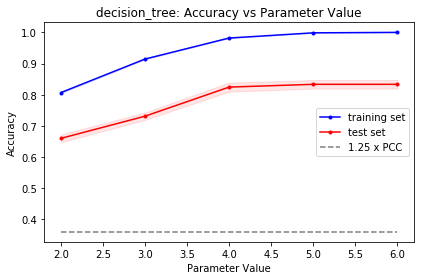

Report:
Max average accuracy: 0.8333
Var of accuracy at optimal parameter: 0.0139
Optimal parameter: 6.0000
Total iterations: 30
1.25 x PCC: 0.3602
Total iterations: 30

Confusion Matrix Using Best Parameters


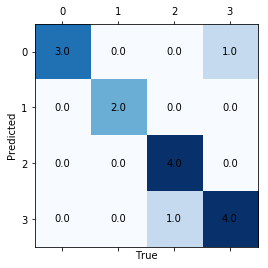

In [89]:
ml_class = ML_Classifier()
param_range = [2, 3, 4, 5, 6]
acc_dt, param_dt = ml_class.fit(
    X, y, ml_type='decision_tree', param_range=param_range)
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = DecisionTreeClassifier(max_depth=param_dt)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
inds = np.argsort(ml_class.coefs_all)[::-1]  # n classes X n features
top_predictor_dt = X.columns[inds]
    
param_dt = {'max_depth' : param_dt}

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

#### Random Forest

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


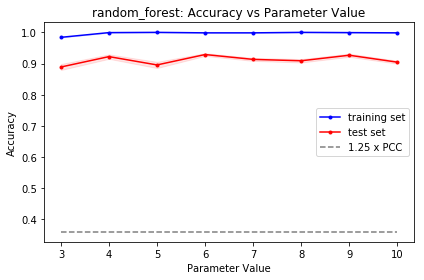

Report:
Max average accuracy: 0.9289
Var of accuracy at optimal parameter: 0.0044
Optimal parameter: 6.0000
Total iterations: 30
1.25 x PCC: 0.3602
Total iterations: 30

Confusion Matrix Using Best Parameters


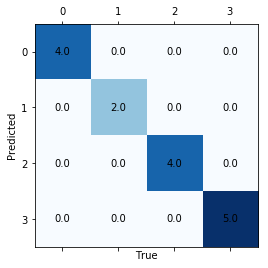

In [90]:
ml_class = ML_Classifier()
param_range = [3, 4, 5, 6, 7, 8, 9, 10]
acc_rf, param_rf = ml_class.fit(
    X, y, ml_type='random_forest', param_range=param_range)
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = RandomForestClassifier(max_depth=param_rf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
inds = np.argsort(clf.feature_importances_)[::-1]  # n classes X n features
top_predictor_rf = X.columns[inds]
    
param_rf = {'max_depth' : param_rf}

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

#### Gradient Boosting

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


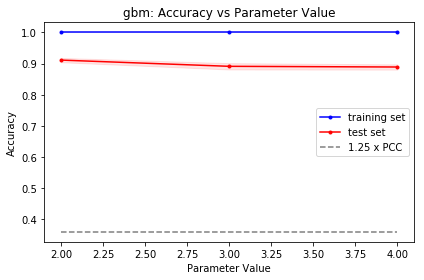

Report:
Max average accuracy: 0.9111
Var of accuracy at optimal parameter: 0.0069
Optimal parameter: 2.0000
Total iterations: 30
1.25 x PCC: 0.3602
Total iterations: 30

Confusion Matrix Using Best Parameters


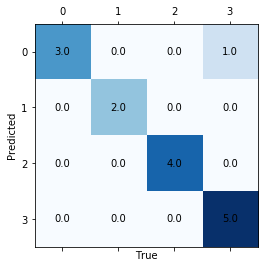

In [91]:
ml_class = ML_Classifier()
param_range = [2, 3, 4]
acc_gbm_class, param_gbm_class = ml_class.fit(
    X, y, ml_type='gbm', param_range=param_range)
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = GradientBoostingClassifier(max_features=param_gbm_class)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
inds = np.argsort(ml_class.coefs_all)[::-1]  # n classes X n features

top_predictor_gbm = X.columns[inds]

param_gbm_class = {'max_depth' : param_gbm_class}

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

In [92]:
# # gbm class
# param_grid = {'max_depth':range(2, 7), 'learning_rate':[0.01, 0.1]}
# clf = GradientBoostingClassifier()
# reg = GridSearchCV(clf, param_grid = param_grid, return_train_score=True)
# reg.fit(X_train, y_train)
# results = pd.DataFrame(reg.cv_results_)
# params_1 = results.param_max_depth
# params_2 = results.param_learning_rate
# train_score = results.mean_train_score
# test_score = results.mean_test_score

# plt.scatter(params_1, train_score, label='train')
# plt.scatter(params_1, test_score, label='test')
# plt.xlabel("Parameters")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs Max Depth")
# plt.legend()
# plt.show()

# plt.scatter(params_2, train_score, label='train')
# plt.scatter(params_2, test_score, label='test')
# plt.xlabel("Parameters")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.title("Accuracy vs Learning Rate")

# best_param_gbm_class = reg.best_params_
# best_accuracy_gbm_class = reg.best_score_

# print("Best accuracy:",best_param_gbm_class)
# print("Best parameter:",best_accuracy_gbm_class)

#### Naive Bayes

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


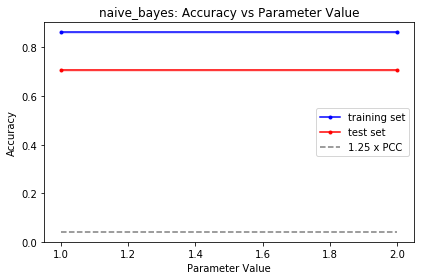

Report:
Max average accuracy: 0.7078
Var of accuracy at optimal parameter: 0.0031
Optimal parameter: 1.0000
Total iterations: 30
1.25 x PCC: 0.0425
Total iterations: 30

Confusion Matrix Using Best Parameters


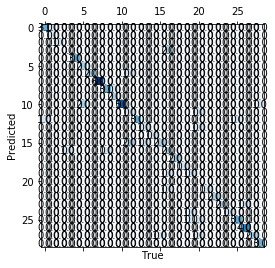

In [25]:
ml_class = ML_Classifier()
acc_naive_bayes, param_naive_bayes = ml_class.fit(
    X, y, ml_type='naive_bayes', param_range=(1, 2))
ml_class.plot()

# predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
inds = np.argsort(ml_class.coefs_all)[::-1]  # n classes X n features

top_predictor_naive_bayes = X.columns[inds]

param_naive_bayes = '-'

# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# roc_curve(y_test, y_pred)

### Summary

In [ ]:
classifiers = pd.Series(['knn_class',
                         'log_reg_l1',
                         'log_reg_l2',
                         'linear_svm_l1',
                         'linear_svm_l2',
                         'decision_tree',
                         'random_forest',
                         'gbm',
                         'naive_bayes'], name='ML_Type')

accuracies = pd.Series([acc_knn_class,
                        acc_log_reg_l1,
                        acc_log_reg_l2,
                        acc_lsvm_l1,
                        acc_lsvm_l2,
                        acc_dt,
                        acc_rf,
                        acc_gbm_class,
                        acc_naive_bayes], name='Accuracy')

parameters = pd.Series([param_knn_class, 
                        param_log_reg_l1, 
                        param_log_reg_l2,
                        param_lsvm_l1,
                        param_log_reg_l2,
                        param_dt,
                        param_rf, 
                        param_gbm_class,
                       param_naive_bayes], name='Best Parameter')

top_predictors = pd.Series(['-', 
                            top_predictor_log_reg_l1[0],
                            top_predictor_log_reg_l2[0],
                            top_predictor_lsvm_l1[0],
                            top_predictor_lsvm_l2[0],
                            top_predictor_dt[0],
                            top_predictor_rf[0], 
                            top_predictor_gbm[0],
                           '-'], name="Top Predictor")
df_summary = pd.concat(
    [classifiers, accuracies, parameters, top_predictors], axis=1)
df_summary.sort_values(by="Accuracy", ascending=False)